# ICA (Individual Component Analysis)

### Primero se analiza la señal en la cual el sujeto escucha la música en su idioma nativo

Creating RawArray with float64 data, n_channels=4, n_times=39764
    Range : 0 ... 39763 =      0.000 ...   198.815 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 30.00 Hz: -6.02, -6.02 dB



C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\3040643317.py:15: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\3040643317.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\ashle\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\3040643317.py:20: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\3040643317.py:20: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\ashle\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.3s.


Method,picard
Fit parameters,max_iter=500
Fit,17 iterations on raw data (39764 samples)
ICA components,4
Available PCA components,4
Channel types,eeg
ICA components marked for exclusion,—


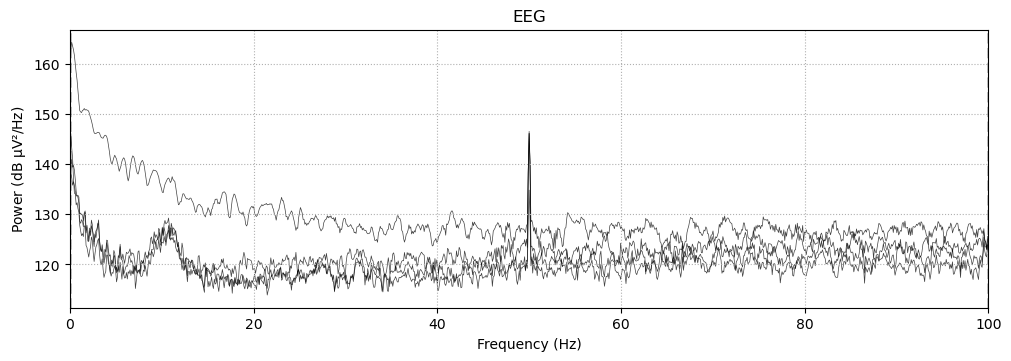

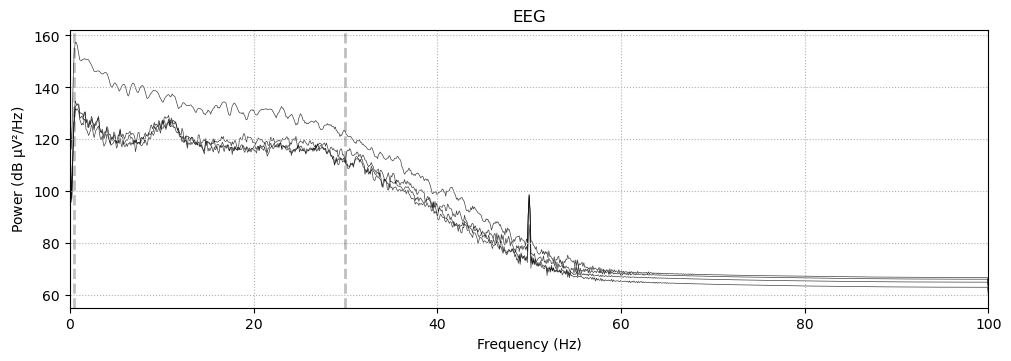

In [1]:
import mne
import pandas as pd
Fs=200
raw_fname = "s01_ex05.txt"
df = pd.read_csv(raw_fname)
channel_names1 = ["T7", "F8", "Cz", "P4"]
channel_names=df.columns[1:5]
#Creación de la estructura de datos de MNE
info = mne.create_info(channel_names1, Fs, ch_types="eeg")
data_values = df[channel_names].values.T
#Creación del objeto Raw
raw = mne.io.RawArray(data_values, info)

#Se nuestra la señal previo al filtrado
raw.plot_psd()
#Filtrado, se usa una frec inferior de 0.5 Hz y una frec superior de 30 Hz
raw.filter(l_freq=0.5, h_freq=30, picks=None, method='iir')

#Se muestra la señal posterior al filtrado
raw.plot_psd()
#Preprocesamiento de la señal ICA
ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)



In [2]:
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=4, n_times=39764
    Range : 0 ... 39763 =      0.000 ...   198.815 secs
Ready.
Using qt as 2D backend.


Se procede a hacer una inspección respecto a los ICAs, se tienen 4

Creating RawArray with float64 data, n_channels=4, n_times=39764
    Range : 0 ... 39763 =      0.000 ...   198.815 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 30.00 Hz: -6.02, -6.02 dB

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
99 matching events f

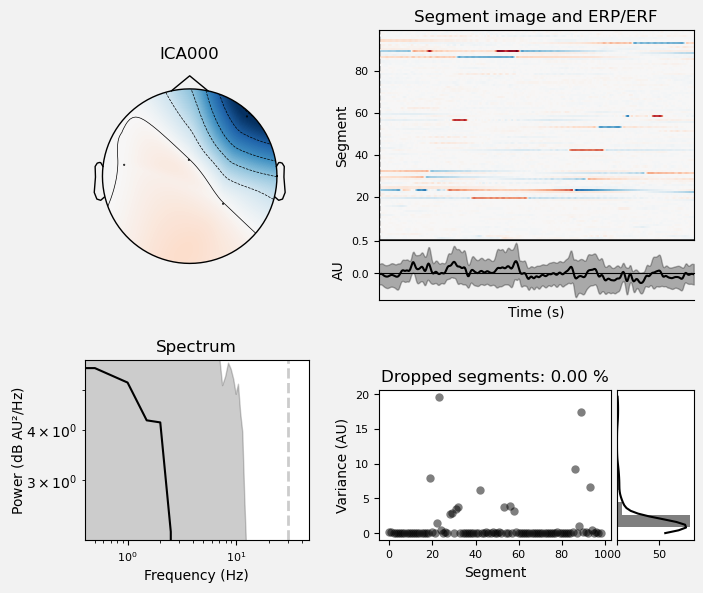

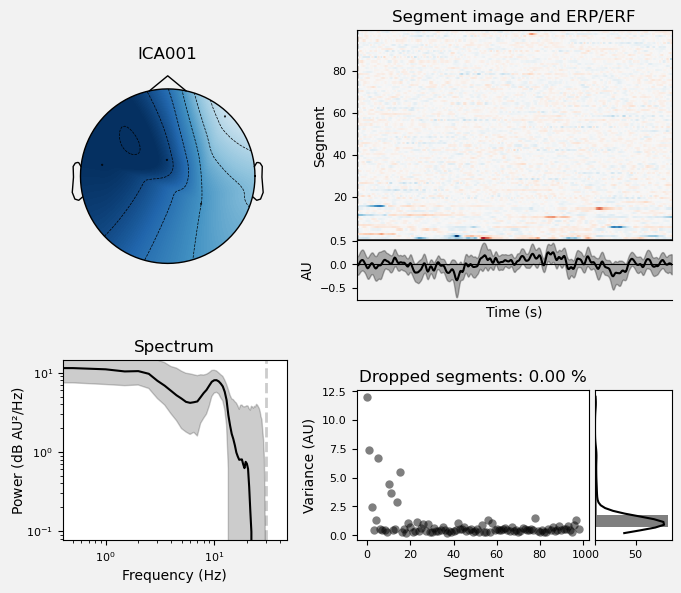

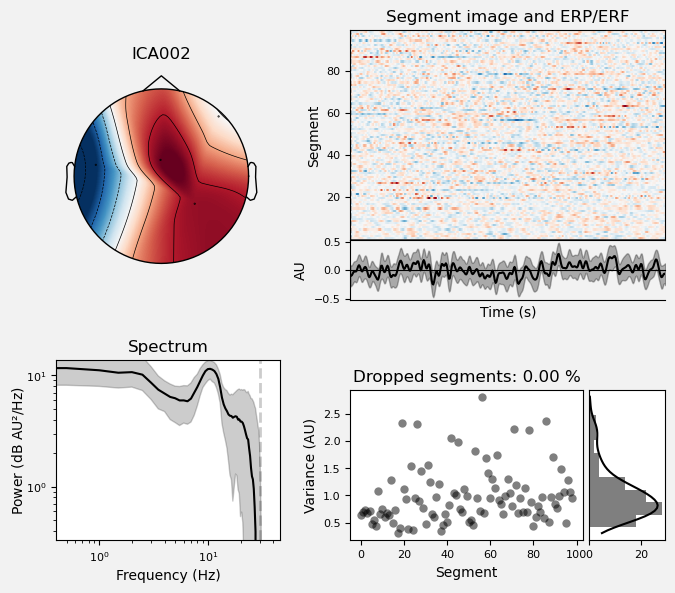

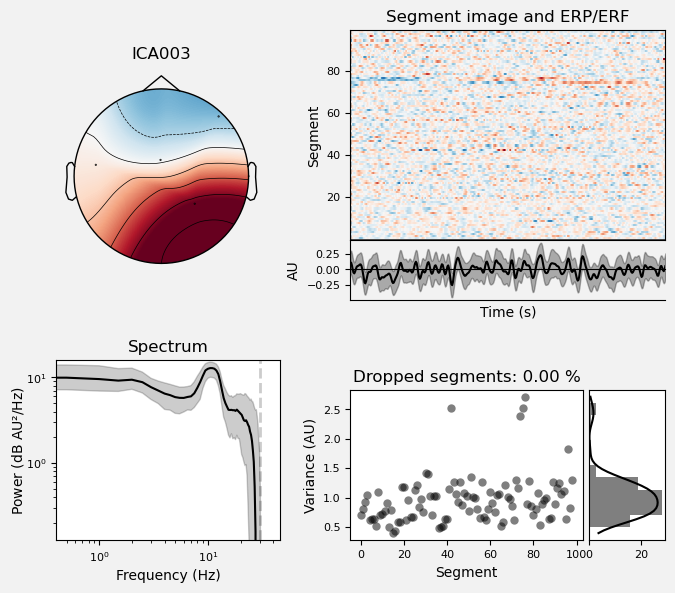

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [3]:
channel_names1 = ["T7", "F8", "Cz", "P4"]
channel_names=df.columns[1:5]
#Creación de la estructura de datos de MNE
info = mne.create_info(channel_names1, Fs, ch_types="eeg")
data_values = df[channel_names].values.T
#Creación del objeto Raw
raw = mne.io.RawArray(data_values, info)


montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
#Filtrado, se usa una frec inferior de 0.5 Hz y una frec superior de 30 Hz
raw.filter(l_freq=0.5, h_freq=30, picks=None, method='iir')
#Preprocesamiento de la señal ICA
ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)
idx = [0, 1, 2, 3]
ica.plot_properties(raw, picks=idx, log_scale=True)

Se procede a hacer una inspección manual de los ICA, para identificar artefactos y proceder con la eliminación de los mismos.

Luego, de la inspección se determinan que no se presentan artefactos

Effective window size : 10.240 (s)


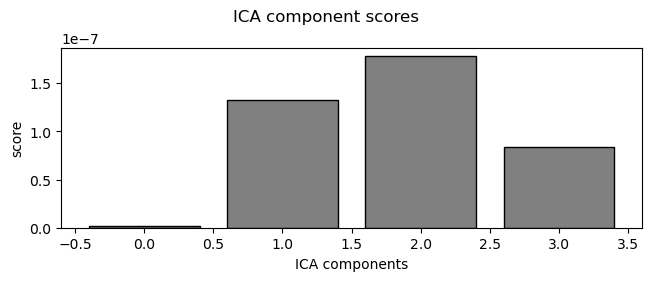

Manually found muscle artifact ICA components:      No se presentan artefactos musculares
Automatically found muscle artifact ICA components: []


In [4]:
muscle_idx="No se presentan artefactos musculares"
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

### Ahora, se procede con el sujeto escucha música en su idioma no nativo

Creating RawArray with float64 data, n_channels=4, n_times=41195
    Range : 0 ... 41194 =      0.000 ...   205.970 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 30.00 Hz: -6.02, -6.02 dB

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).
Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components


C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\826505463.py:15: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\826505463.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\ashle\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\826505463.py:20: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
C:\Users\ashle\AppData\Local\Temp\ipykernel_21476\826505463.py:20: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\ashle\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: F

Fitting ICA took 0.5s.
Creating RawArray with float64 data, n_channels=4, n_times=41195
    Range : 0 ... 41194 =      0.000 ...   205.970 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 30.00 Hz: -6.02, -6.02 dB

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Not setting met

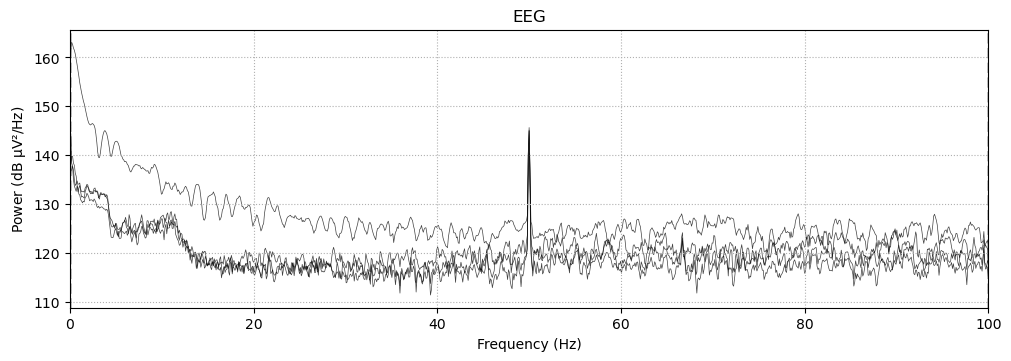

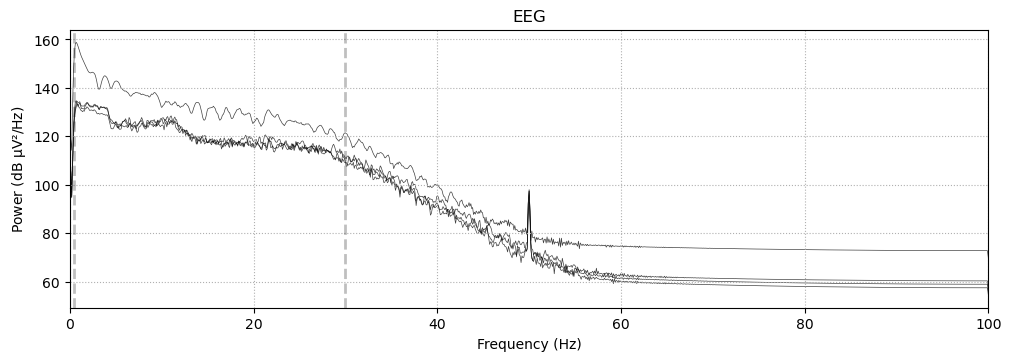

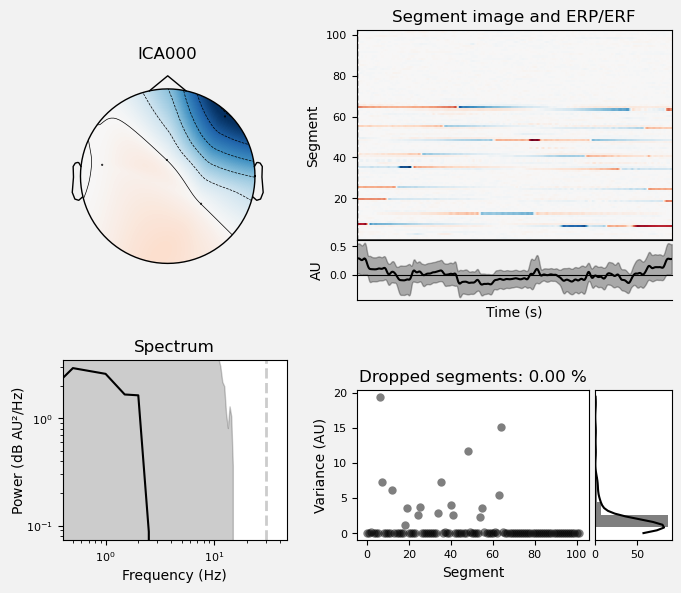

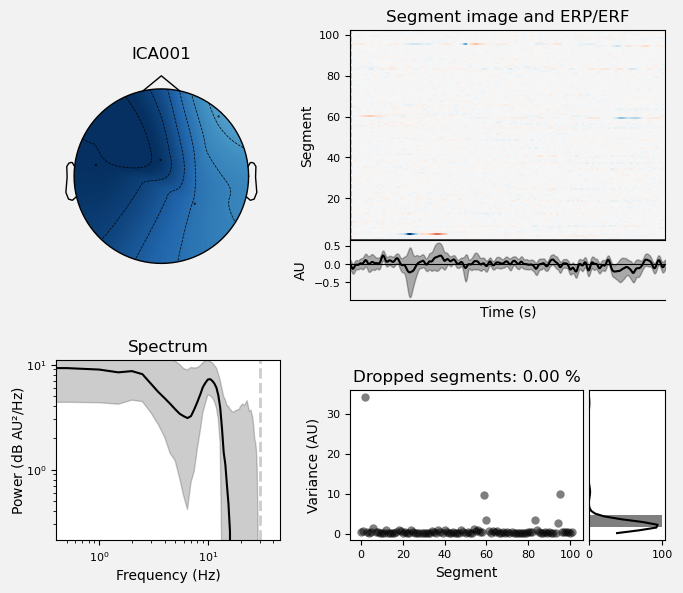

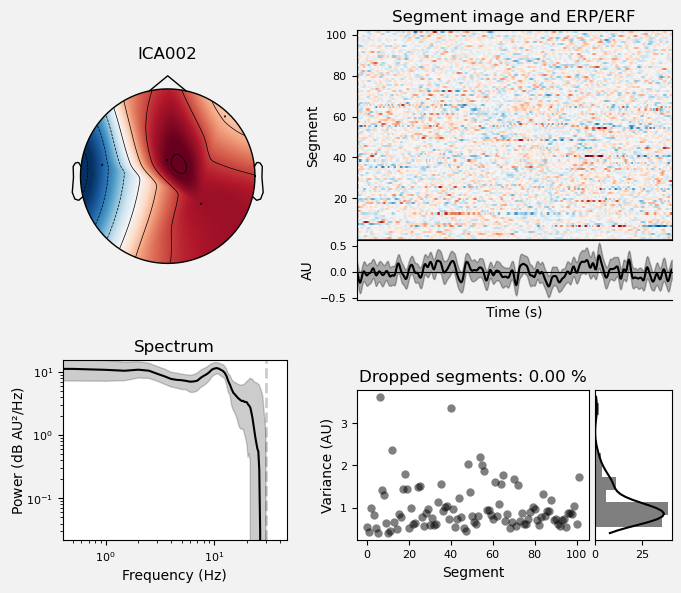

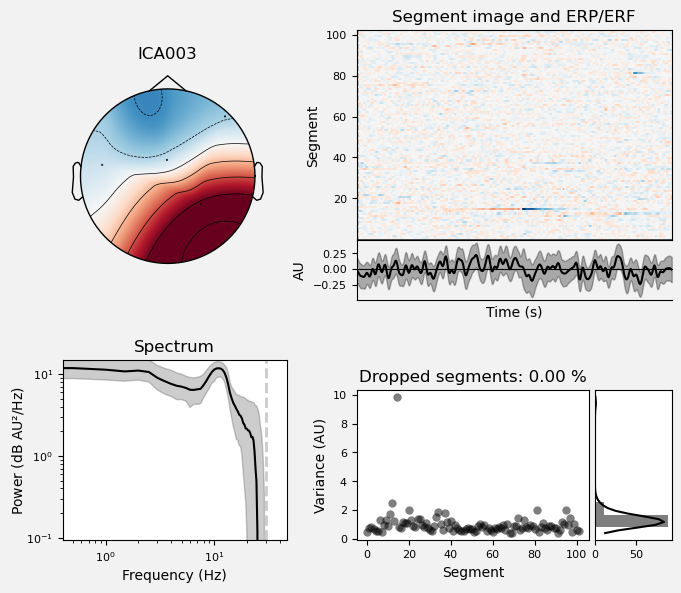

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [5]:
import mne
import pandas as pd
Fs=200
raw_fname = "s01_ex06.txt"
df = pd.read_csv(raw_fname)
channel_names1 = ["T7", "F8", "Cz", "P4"]
channel_names=df.columns[1:5]
#Creación de la estructura de datos de MNE
info = mne.create_info(channel_names1, Fs, ch_types="eeg")
data_values = df[channel_names].values.T
#Creación del objeto Raw
raw = mne.io.RawArray(data_values, info)

#Se nuestra la señal previo al filtrado
raw.plot_psd()
#Filtrado, se usa una frec inferior de 0.5 Hz y una frec superior de 30 Hz
raw.filter(l_freq=0.5, h_freq=30, picks=None, method='iir')

#Se muestra la señal posterior al filtrado
raw.plot_psd()
#Preprocesamiento de la señal ICA
ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)
channel_names1 = ["T7", "F8", "Cz", "P4"]
channel_names=df.columns[1:5]
#Creación de la estructura de datos de MNE
info = mne.create_info(channel_names1, Fs, ch_types="eeg")
data_values = df[channel_names].values.T
#Creación del objeto Raw
raw = mne.io.RawArray(data_values, info)


montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
#Filtrado, se usa una frec inferior de 0.5 Hz y una frec superior de 30 Hz
raw.filter(l_freq=0.5, h_freq=30, picks=None, method='iir')
#Preprocesamiento de la señal ICA
ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)
idx = [0, 1, 2, 3]
ica.plot_properties(raw, picks=idx, log_scale=True)

Effective window size : 10.240 (s)


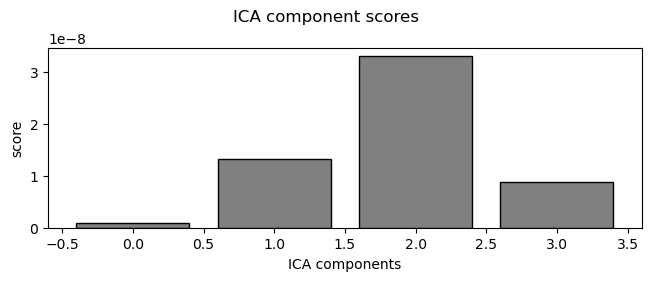

Manually found muscle artifact ICA components:      No se presentan artefactos musculares
Automatically found muscle artifact ICA components: []


In [6]:
muscle_idx="No se presentan artefactos musculares"
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

# Feature extraction (Wavelet Transform)

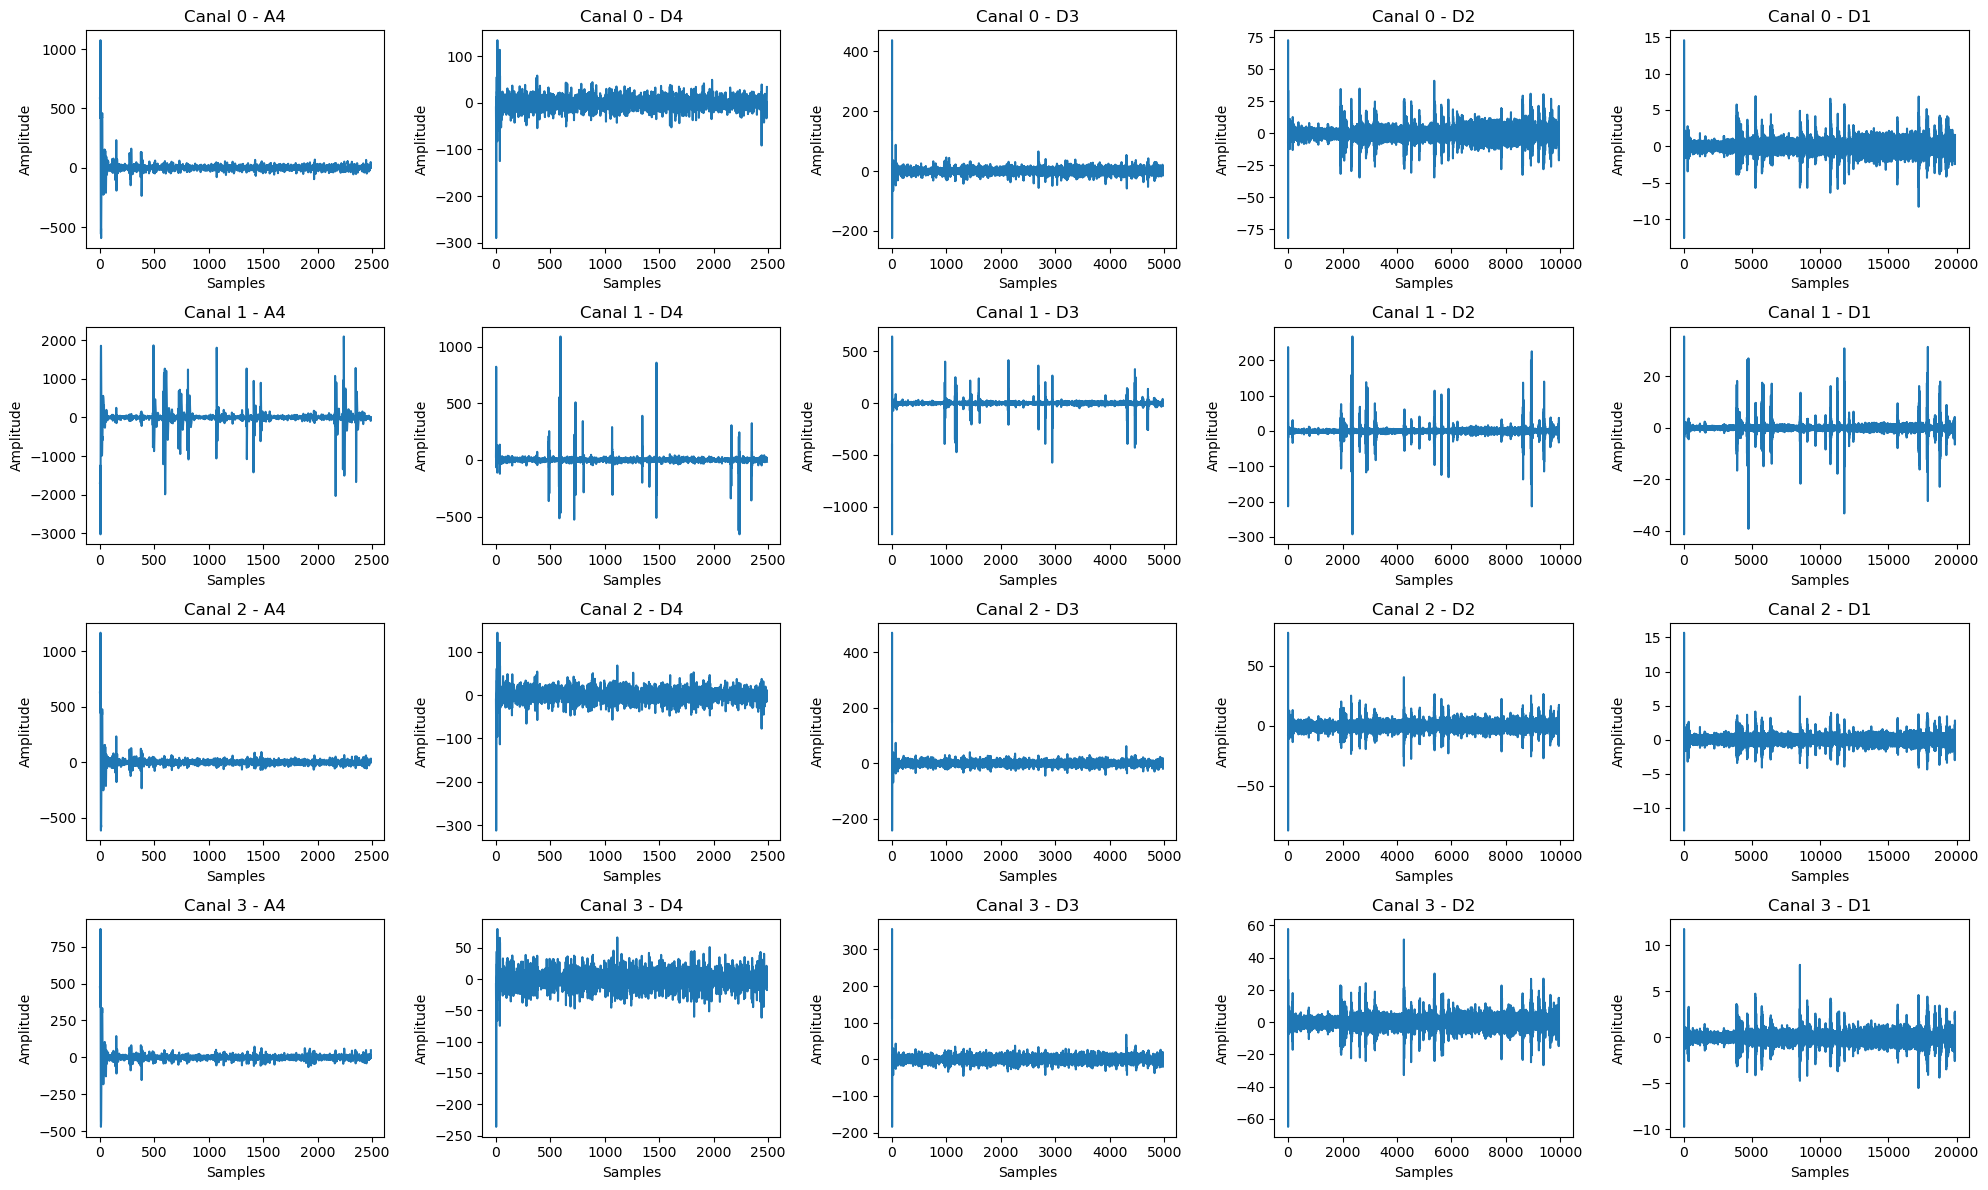

Características del Canal 0: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(185.0855935467799, 13.604616626233167, 133.13154268044548, 7359745.140498759, 15.811535862455884)
Características del Canal 1: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(4749.882488714046, 68.9193912387076, 34.165572469223456, 188874344.0203095, 19.056592505462117)
Características del Canal 2: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(192.40225192871634, 13.870913882247137, 165.11898853781295, 7650684.972656004, 15.85030574070363)
Características del Canal 3: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(116.25555468231545, 10.78218691557123, 140.39344926299552, 4622786.527707899, 15.346508225764886)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis

# Función para diseñar el filtro pasabanda
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Función para aplicar el filtro pasabanda
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Función para aplicar la DWT y obtener coeficientes
def apply_dwt(data, wavelet='db4', level=4):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    return coeffs

# Función para calcular características
def calculate_features(signal):
    N = len(signal)
    mean_signal = np.mean(signal)
    
    # Varianza
    variance = np.var(signal)
    
    # Desviación estándar
    std_dev = np.std(signal)
    
    # Curtosis
    kurt = kurtosis(signal)
    
    # Energía no normalizada
    energy = np.sum(np.square(signal))
    
    # Logarithmic Bandpower (LBP)
    lbp = np.log(np.sum(np.square(signal)))
    
    return variance, std_dev, kurt, energy, lbp

# Leer el archivo .txt
file_path = "s01_ex05.txt"
df = pd.read_csv(file_path)

# Seleccionar los canales de EEG
canales = df.iloc[:, 1:5]
canal0 = canales.iloc[:, 0]
canal1 = canales.iloc[:, 1]
canal2 = canales.iloc[:, 2]
canal3 = canales.iloc[:, 3]

# Parámetros del filtro
lowcut = 0.48
highcut = 30.0
Fs = 200  # Frecuencia de muestreo en Hz

# Aplicar el filtro a cada canal
canal0_filtrado = bandpass_filter(canal0, lowcut, highcut, Fs)
canal1_filtrado = bandpass_filter(canal1, lowcut, highcut, Fs)
canal2_filtrado = bandpass_filter(canal2, lowcut, highcut, Fs)
canal3_filtrado = bandpass_filter(canal3, lowcut, highcut, Fs)

# Aplicar la DWT a cada canal filtrado y obtener los coeficientes
coeffs_canal0 = apply_dwt(canal0_filtrado)
coeffs_canal1 = apply_dwt(canal1_filtrado)
coeffs_canal2 = apply_dwt(canal2_filtrado)
coeffs_canal3 = apply_dwt(canal3_filtrado)

# Obtener los coeficientes de detalle y aproximación de cada nivel
A4_0, D4_0, D3_0, D2_0, D1_0 = coeffs_canal0
A4_1, D4_1, D3_1, D2_1, D1_1 = coeffs_canal1
A4_2, D4_2, D3_2, D2_2, D1_2 = coeffs_canal2
A4_3, D4_3, D3_3, D2_3, D1_3 = coeffs_canal3

# Crear subplots para los coeficientes de detalle y aproximación
fig, axs = plt.subplots(4, 5, figsize=(20, 12))

def plot_coefficients(ax, coeff, title):
    ax.plot(coeff)
    ax.set_title(title)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')

# Canal 0
plot_coefficients(axs[0, 0], A4_0, 'Canal 0 - A4')
plot_coefficients(axs[0, 1], D4_0, 'Canal 0 - D4')
plot_coefficients(axs[0, 2], D3_0, 'Canal 0 - D3')
plot_coefficients(axs[0, 3], D2_0, 'Canal 0 - D2')
plot_coefficients(axs[0, 4], D1_0, 'Canal 0 - D1')

# Canal 1
plot_coefficients(axs[1, 0], A4_1, 'Canal 1 - A4')
plot_coefficients(axs[1, 1], D4_1, 'Canal 1 - D4')
plot_coefficients(axs[1, 2], D3_1, 'Canal 1 - D3')
plot_coefficients(axs[1, 3], D2_1, 'Canal 1 - D2')
plot_coefficients(axs[1, 4], D1_1, 'Canal 1 - D1')

# Canal 2
plot_coefficients(axs[2, 0], A4_2, 'Canal 2 - A4')
plot_coefficients(axs[2, 1], D4_2, 'Canal 2 - D4')
plot_coefficients(axs[2, 2], D3_2, 'Canal 2 - D3')
plot_coefficients(axs[2, 3], D2_2, 'Canal 2 - D2')
plot_coefficients(axs[2, 4], D1_2, 'Canal 2 - D1')

# Canal 3
plot_coefficients(axs[3, 0], A4_3, 'Canal 3 - A4')
plot_coefficients(axs[3, 1], D4_3, 'Canal 3 - D4')
plot_coefficients(axs[3, 2], D3_3, 'Canal 3 - D3')
plot_coefficients(axs[3, 3], D2_3, 'Canal 3 - D2')
plot_coefficients(axs[3, 4], D1_3, 'Canal 3 - D1')

plt.tight_layout()
plt.show()

# Calcular características para cada coeficiente
features_canal0 = calculate_features(canal0_filtrado)
features_canal1 = calculate_features(canal1_filtrado)
features_canal2 = calculate_features(canal2_filtrado)
features_canal3 = calculate_features(canal3_filtrado)

print("Características del Canal 0: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal0)
print("Características del Canal 1: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal1)
print("Características del Canal 2: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal2)
print("Características del Canal 3: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal3)

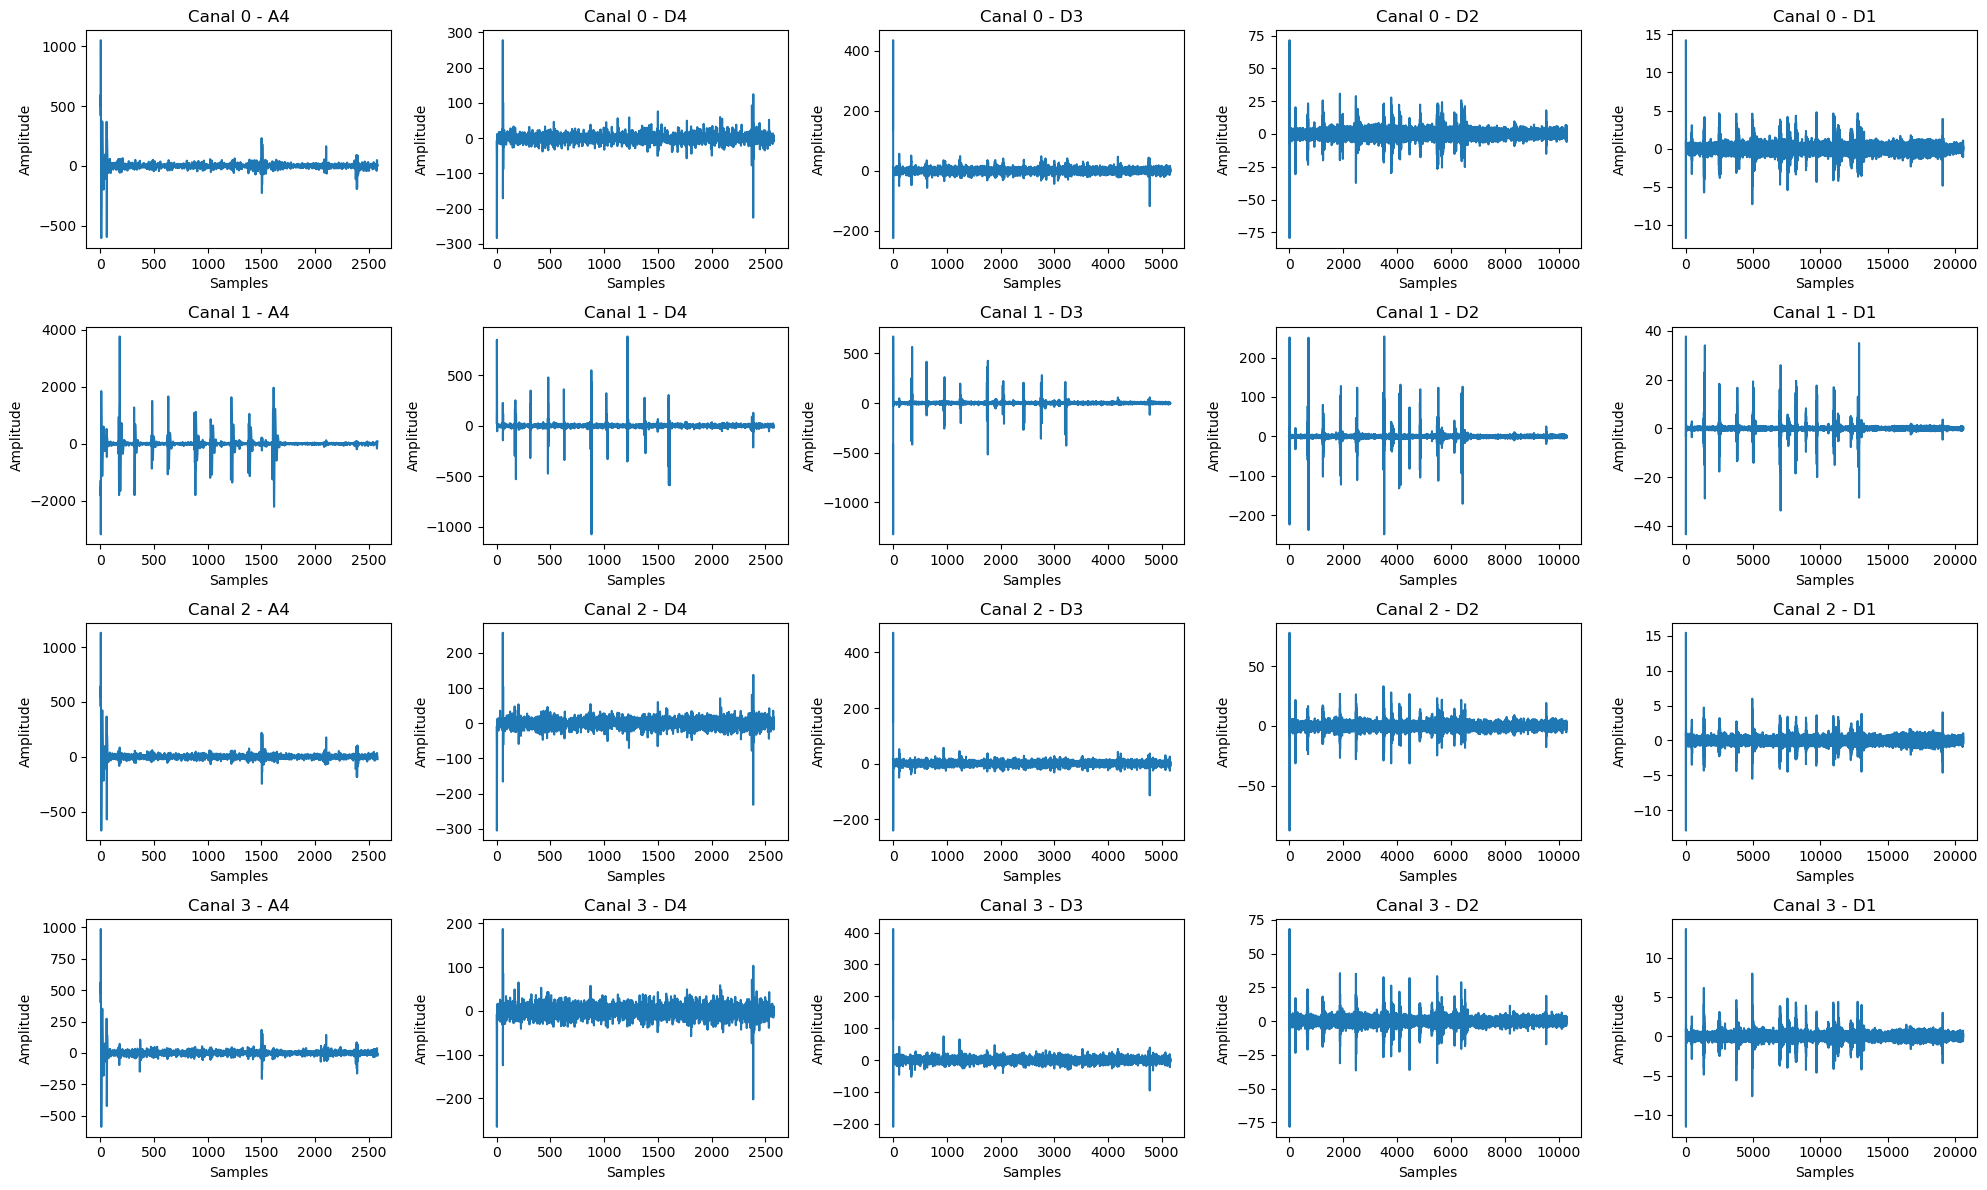

Características del Canal 0: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(167.7844175669871, 12.953162454280696, 154.89283922672823, 6911882.185927331, 15.748752544460713)
Características del Canal 1: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(5474.313419430032, 73.98860330773944, 41.61592137053296, 225514352.60767847, 19.233894362809185)
Características del Canal 2: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(186.35259942273854, 13.651102498433543, 168.49394531112537, 7676796.110681906, 15.85371284499466)
Características del Canal 3: Varianza, Desv. Estándar, Curtosis, Energía, LBP
(146.12844381110824, 12.08835984784984, 152.52640467283345, 6019761.264885493, 15.61055815950288)


In [8]:
# Leer el archivo .txt
file_path = "s01_ex06.txt"
df = pd.read_csv(file_path)

# Seleccionar los canales de EEG
canales = df.iloc[:, 1:5]
canal0 = canales.iloc[:, 0]
canal1 = canales.iloc[:, 1]
canal2 = canales.iloc[:, 2]
canal3 = canales.iloc[:, 3]

# Parámetros del filtro
lowcut = 0.48
highcut = 30.0
Fs = 200  # Frecuencia de muestreo en Hz

# Aplicar el filtro a cada canal
canal0_filtrado = bandpass_filter(canal0, lowcut, highcut, Fs)
canal1_filtrado = bandpass_filter(canal1, lowcut, highcut, Fs)
canal2_filtrado = bandpass_filter(canal2, lowcut, highcut, Fs)
canal3_filtrado = bandpass_filter(canal3, lowcut, highcut, Fs)

# Aplicar la DWT a cada canal filtrado y obtener los coeficientes
coeffs_canal0 = apply_dwt(canal0_filtrado)
coeffs_canal1 = apply_dwt(canal1_filtrado)
coeffs_canal2 = apply_dwt(canal2_filtrado)
coeffs_canal3 = apply_dwt(canal3_filtrado)

# Obtener los coeficientes de detalle y aproximación de cada nivel
A4_0, D4_0, D3_0, D2_0, D1_0 = coeffs_canal0
A4_1, D4_1, D3_1, D2_1, D1_1 = coeffs_canal1
A4_2, D4_2, D3_2, D2_2, D1_2 = coeffs_canal2
A4_3, D4_3, D3_3, D2_3, D1_3 = coeffs_canal3

# Crear subplots para los coeficientes de detalle y aproximación
fig, axs = plt.subplots(4, 5, figsize=(20, 12))

def plot_coefficients(ax, coeff, title):
    ax.plot(coeff)
    ax.set_title(title)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')

# Canal 0
plot_coefficients(axs[0, 0], A4_0, 'Canal 0 - A4')
plot_coefficients(axs[0, 1], D4_0, 'Canal 0 - D4')
plot_coefficients(axs[0, 2], D3_0, 'Canal 0 - D3')
plot_coefficients(axs[0, 3], D2_0, 'Canal 0 - D2')
plot_coefficients(axs[0, 4], D1_0, 'Canal 0 - D1')

# Canal 1
plot_coefficients(axs[1, 0], A4_1, 'Canal 1 - A4')
plot_coefficients(axs[1, 1], D4_1, 'Canal 1 - D4')
plot_coefficients(axs[1, 2], D3_1, 'Canal 1 - D3')
plot_coefficients(axs[1, 3], D2_1, 'Canal 1 - D2')
plot_coefficients(axs[1, 4], D1_1, 'Canal 1 - D1')

# Canal 2
plot_coefficients(axs[2, 0], A4_2, 'Canal 2 - A4')
plot_coefficients(axs[2, 1], D4_2, 'Canal 2 - D4')
plot_coefficients(axs[2, 2], D3_2, 'Canal 2 - D3')
plot_coefficients(axs[2, 3], D2_2, 'Canal 2 - D2')
plot_coefficients(axs[2, 4], D1_2, 'Canal 2 - D1')

# Canal 3
plot_coefficients(axs[3, 0], A4_3, 'Canal 3 - A4')
plot_coefficients(axs[3, 1], D4_3, 'Canal 3 - D4')
plot_coefficients(axs[3, 2], D3_3, 'Canal 3 - D3')
plot_coefficients(axs[3, 3], D2_3, 'Canal 3 - D2')
plot_coefficients(axs[3, 4], D1_3, 'Canal 3 - D1')

plt.tight_layout()
plt.show()

# Calcular características para cada coeficiente
features_canal0 = calculate_features(canal0_filtrado)
features_canal1 = calculate_features(canal1_filtrado)
features_canal2 = calculate_features(canal2_filtrado)
features_canal3 = calculate_features(canal3_filtrado)

print("Características del Canal 0: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal0)
print("Características del Canal 1: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal1)
print("Características del Canal 2: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal2)
print("Características del Canal 3: Varianza, Desv. Estándar, Curtosis, Energía, LBP")
print(features_canal3)